In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display

In [69]:
y, sr = librosa.load('../../../generativevocalizationnetwork/data/song_wavs/b1094/wavs/2017-03-31_13-09-16-460000.wav')

In [70]:
sr

22050

In [71]:
y = y[int(sr*7.9):sr*56]

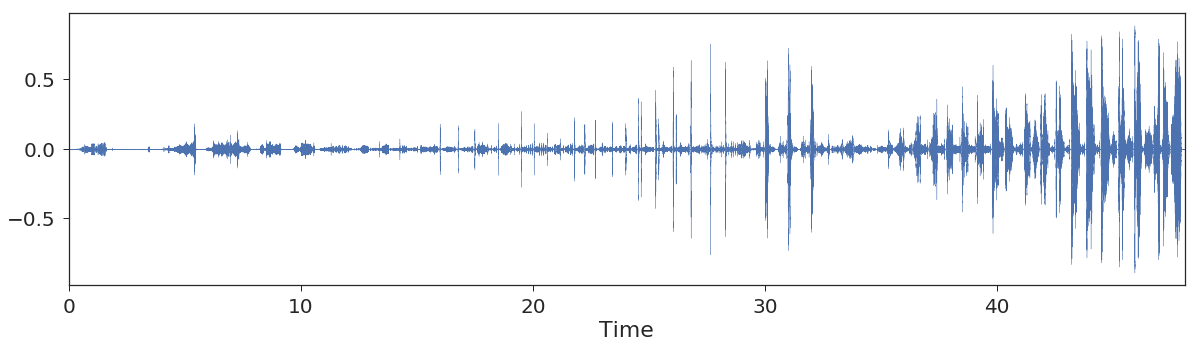

In [72]:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(y, sr=sr)

In [73]:
IPython.display.Audio(y,rate=sr)

In [77]:
len(y)/sr

48.1

In [78]:
librosa.output.write_wav('assets/audio/starling.wav', y, sr)

In [75]:
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)

/mnt/cube/tsainbur/conda_envs/txori_py3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


In [58]:
sr

22050

In [7]:
fft_rate = int(np.shape(D)[1]//(len(y)/sr))
fft_rate

43

In [24]:
np.shape(D)[1]/fft_rate/2

24.093023255813954

In [27]:
int(np.shape(D)[1]/2)

1036

In [66]:
import seaborn as sns
sns.set_context('paper')
sns.set(font_scale=2)  # crazy big
sns.set_style("ticks")


/mnt/cube/tsainbur/conda_envs/txori_py3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


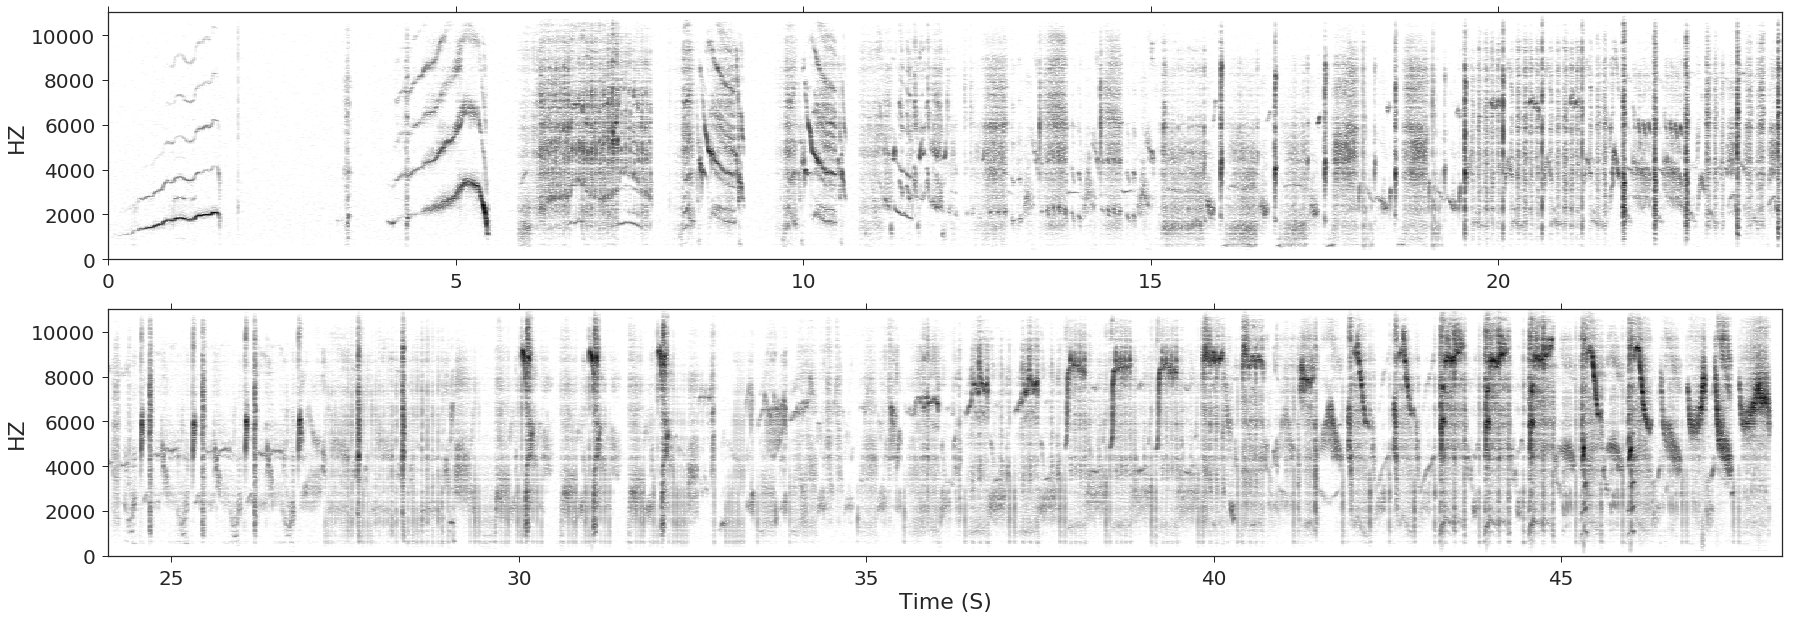

In [67]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(30, 10))
ax[0].matshow(D[:,:int(np.shape(D)[1]/2)],extent = [0, np.shape(D)[1]/fft_rate/2, 0, sr/2],aspect='auto', origin='lower', cmap=plt.cm.Greys)
ax[1].matshow(D[:,int(np.shape(D)[1]/2):np.shape(D)[1]],extent = [np.shape(D)[1]/fft_rate/2, np.shape(D)[1]/fft_rate, 0, sr/2],aspect='auto', origin='lower', cmap=plt.cm.Greys)
ax[0].set_ylabel('HZ')
ax[1].set_ylabel('HZ')
ax[1].set_xlabel('Time (S)')
ax[0].tick_params(labelbottom='on',labeltop='off')
ax[1].tick_params(labelbottom='on',labeltop='off')

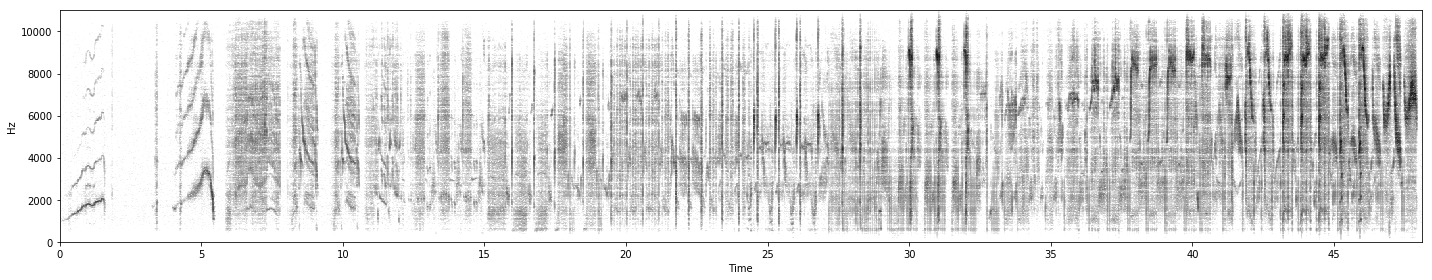

In [31]:
plt.figure(figsize=(20, 4))
librosa.display.specshow(D,cmap='gray_r',
                           y_axis='linear', fmax=sr/2,
                          x_axis='time')
#plt.colorbar(format='%+2.0f dB')
plt.tight_layout()